### Step 1:  Install the neccesary libraries

In [40]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [41]:
!pip install seaborn

In [42]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


### Step 2:  Import the necessary libraries

In [43]:
import pandas as pd
import numpy as np


### Step 3:  Read the xlsx files

In [44]:
textSummary = pd.read_excel('text_summary_datasets_v2.xlsx')
trainingData = pd.read_excel('training_data_v2.xlsx')

### Step 4:  Explore the data


In [45]:
print('Text Summary')
print(textSummary.head())
print(textSummary.info())
print('\n')
print('Training Data')
print(trainingData.head())
print(trainingData.info())


Text Summary
   Index                                          Paragraph  \
0      0  the diagnosis of vkh was made according to the...   
1      1  changes in the is / os junction , the cost lin...   
2      2  twenty - nine patients ( 15 males and 14 femal...   
3      3  our analysis revealed a strong correlation bet...   
4      4  better oct findings correlated to better visio...   

                                             Summary  Category  
0  The diagnosis of VKH followed revised diagnost...         0  
1  The study assessed changes in the IS/OS juncti...         0  
2  The study included 29 patients (15 males, 14 f...         0  
3  Our analysis demonstrated a strong correlation...         0  
4  Better OCT findings were associated with impro...         0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Index      200 non-null    int6

### Step 5:  Apply KNN, Decision Tree, Random Forest and SVM


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV


In [47]:
# split the data containing bert embeddings and category labels
x = trainingData.drop(columns=["Index","Category"]) # bert embeddings as features
y = trainingData["Category"] # target labels (0, 1, 2, 3)

# Split the data into training and testing sets
# 20% of the data will be used for testing
# 80% of the data will be used for training
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


# Define range of n_neighbors values to search
param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}

# Initialize KNN classifier
knn_classifier = KNeighborsClassifier()

# Perform grid search to find the best value of n_neighbors
grid_search = GridSearchCV(knn_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Get the best value of n_neighbors
best_n_neighbors = grid_search.best_params_['n_neighbors']
print("Best value of n_neighbors:", best_n_neighbors)

# train KNN classifier
knn = KNeighborsClassifier(n_neighbors=best_n_neighbors)
knn.fit(x_train, y_train)

# train decision tree classifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

# test and evaluate the KNN classifier
knn_pred = knn.predict(x_test)
knn_accuracy = accuracy_score(y_test, knn_pred)
knn_classification_report = classification_report(y_test, knn_pred)

# test and evaluate the decision tree classifier
dt_pred = dt.predict(x_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
dt_classification_report = classification_report(y_test, dt_pred)

# train random forest classifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

# test and evaluate the random forest classifier
rf_pred = rf.predict(x_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_classification_report = classification_report(y_test, rf_pred)

# train SVM classifier
# why linear kernel? because the data is linearly separable
svm = SVC(kernel='linear', random_state=42)
svm.fit(x_train, y_train)

# test and evaluate the SVM classifier
svm_pred = svm.predict(x_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
svm_classification_report = classification_report(y_test, svm_pred)


# print evaluation results
print('KNN Classifier')
print('Accuracy:', knn_accuracy)
print(knn_classification_report)
print('\n')
print('Decision Tree Classifier')
print('Accuracy:', dt_accuracy)
print(dt_classification_report)
print('\n')
print('Random Forest Classifier')
print('Accuracy:', rf_accuracy)
print(rf_classification_report)
print('\n')
print('SVM Classifier')
print('Accuracy:', svm_accuracy)
print(svm_classification_report)


Best value of n_neighbors: 3
KNN Classifier
Accuracy: 0.9
              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      0.87      0.93        15
           2       1.00      0.78      0.88         9
           3       0.77      1.00      0.87        10

    accuracy                           0.90        40
   macro avg       0.91      0.91      0.90        40
weighted avg       0.92      0.90      0.90        40



Decision Tree Classifier
Accuracy: 0.525
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         6
           1       0.91      0.67      0.77        15
           2       0.00      0.00      0.00         9
           3       0.38      0.50      0.43        10

    accuracy                           0.53        40
   macro avg       0.45      0.54      0.47        40
weighted avg       0.51      0.53      0.50        40



Random Forest Classifier
Ac

### Step 6:  Results

Best value of n_neighbors: 3
KNN Classifier
Accuracy: 0.9

|           | precision | recall | f1-score | support |
|-----------|-----------|--------|----------|---------|
|      0    |    0.86   |  1.00  |   0.92   |    6    |
|      1    |    1.00   |  0.87  |   0.93   |   15    |
|      2    |    1.00   |  0.78  |   0.88   |    9    |
|      3    |    0.77   |  1.00  |   0.87   |   10    |
|-----------|-----------|--------|----------|---------|
|  accuracy |           |        |   0.90   |    40   |
| macro avg |    0.91   |  0.91  |   0.90   |    40   |
|weighted avg|  0.92   |  0.90  |   0.90   |    40   |

Decision Tree Classifier
Accuracy: 0.625
|           | precision | recall | f1-score | support |
|-----------|-----------|--------|----------|---------|
|      0    |    0.62   |  0.83  |   0.71   |    6    |
|      1    |    0.92   |  0.80  |   0.86   |   15    |
|      2    |    0.20   |  0.11  |   0.14   |    9    |
|      3    |    0.50   |  0.70  |   0.58   |   10    |
|-----------|-----------|--------|----------|---------|
|  accuracy |           |        |   0.62   |    40   |
| macro avg |    0.56   |  0.61  |   0.57   |    40   |
|weighted avg|  0.61   |  0.62  |   0.61   |    40   |

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, precision_recall_curve

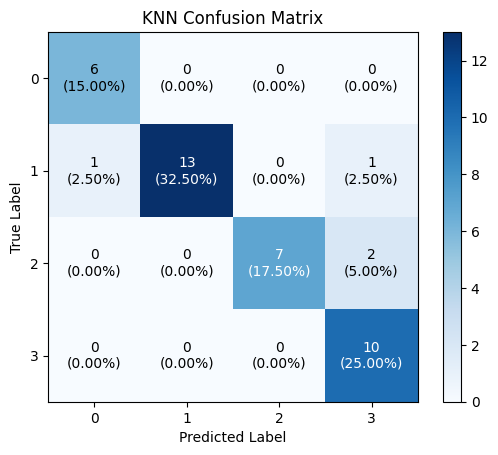

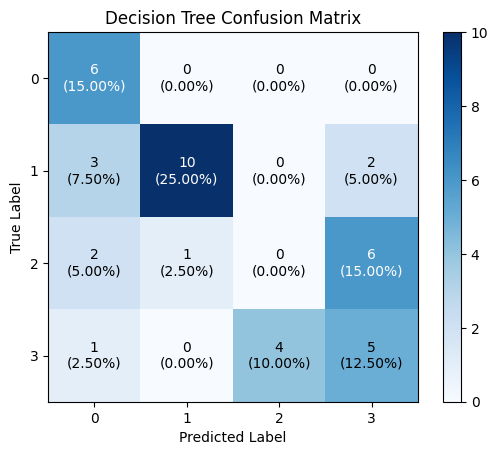

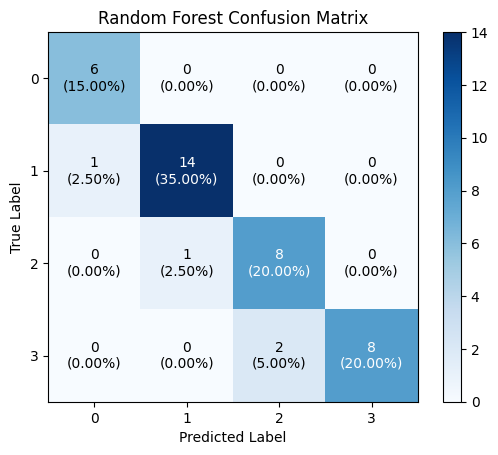

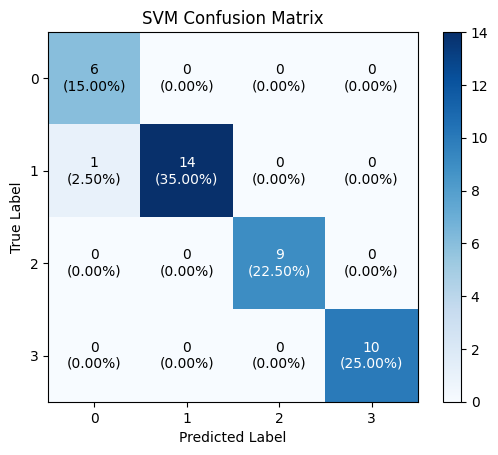

In [49]:

# Confusion Matrix Heatmap
def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = range(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
     # Add frequency labels
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, f"{cm[i, j]}\n({cm[i, j] / np.sum(cm):.2%})",
                     ha="center", va="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

cm_knn = confusion_matrix(y_test, knn_pred)
cm_dt = confusion_matrix(y_test, dt_pred)
cm_rf = confusion_matrix(y_test, rf_pred)
cm_svm = confusion_matrix(y_test, svm_pred)
plot_confusion_matrix(cm_knn, classes=['0', '1', '2', '3'], title='KNN Confusion Matrix')
plt.show()
plot_confusion_matrix(cm_dt, classes=['0', '1', '2', '3'], title='Decision Tree Confusion Matrix')
plt.show()
plot_confusion_matrix(cm_rf, classes=['0', '1', '2', '3'], title='Random Forest Confusion Matrix')
plt.show()
plot_confusion_matrix(cm_svm, classes=['0', '1', '2', '3'], title='SVM Confusion Matrix')
plt.show()

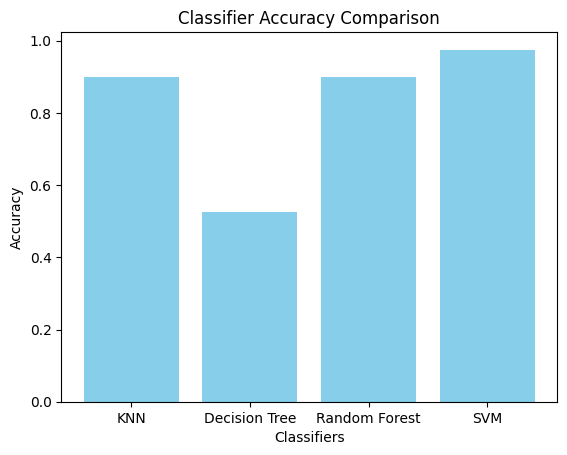

In [50]:
def plot_accuracy_bar(accuracies, classifiers):
    plt.bar(classifiers, accuracies, color='skyblue')
    plt.xlabel('Classifiers')
    plt.ylabel('Accuracy')
    plt.title('Classifier Accuracy Comparison')

accuracies = [knn_accuracy, dt_accuracy, rf_accuracy, svm_accuracy]
classifiers = ['KNN', 'Decision Tree', 'Random Forest', 'SVM']
plot_accuracy_bar(accuracies, classifiers)
plt.show()

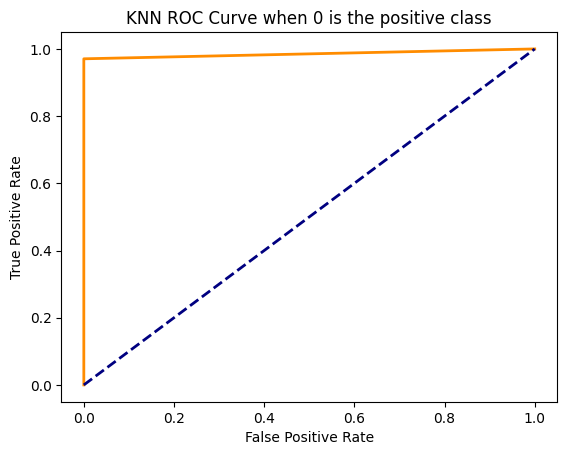

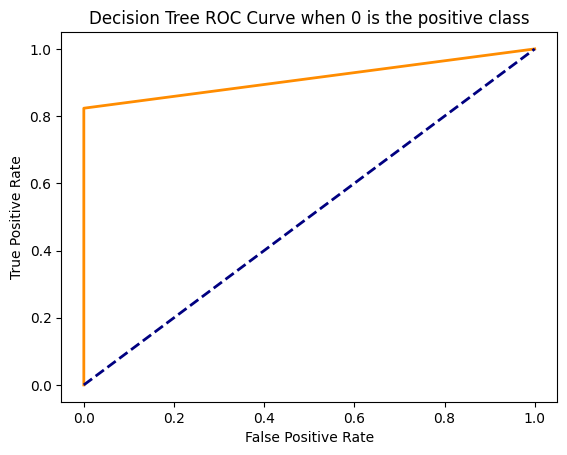

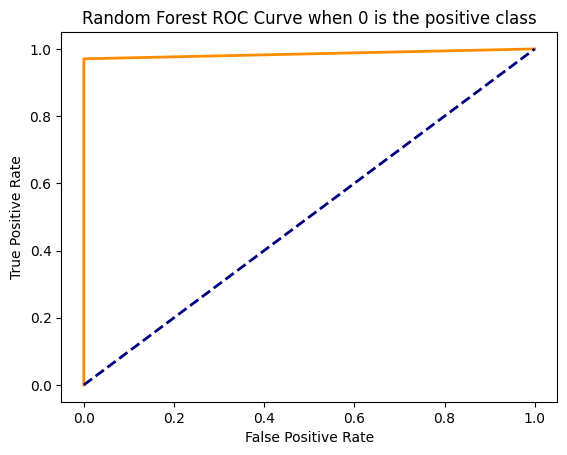

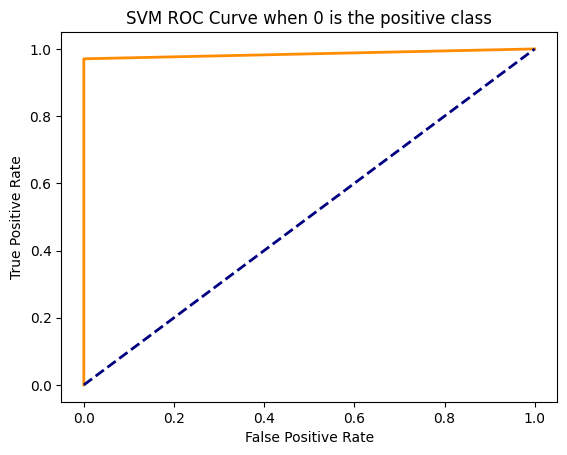

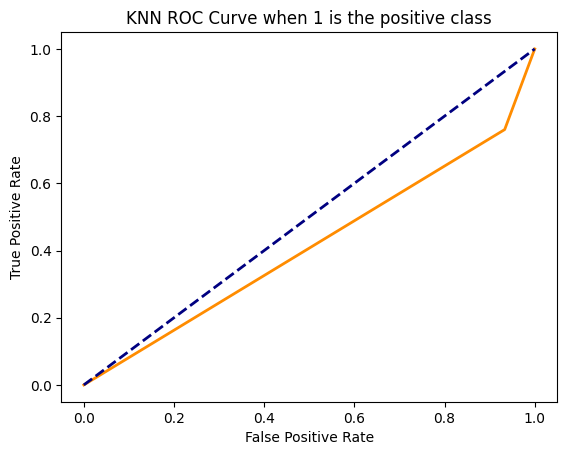

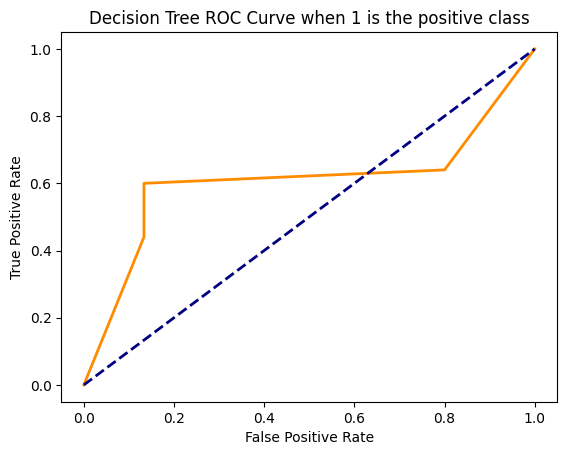

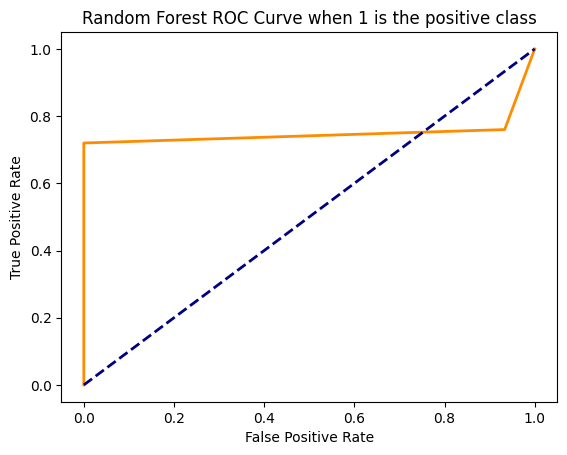

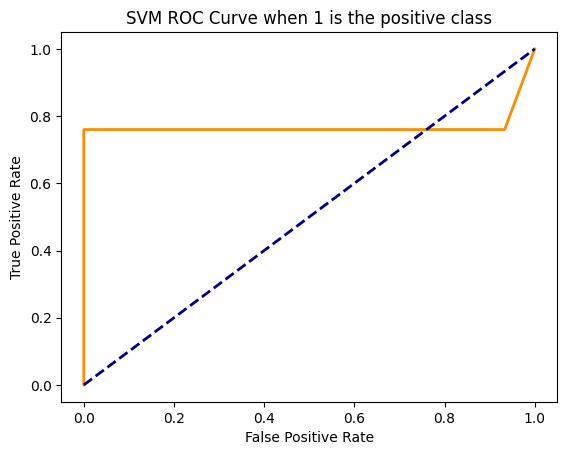

In [69]:
# ROC Curve
def plot_roc_curve(y_test, y_pred, title='ROC Curve'):
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr, color='darkorange', lw=2)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.show()

binary_y_test = np.where(y_test == 0, 0, 1)
plot_roc_curve(binary_y_test, knn_pred, title='KNN ROC Curve when 0 is the positive class')
plot_roc_curve(binary_y_test, dt_pred, title='Decision Tree ROC Curve when 0 is the positive class')
plot_roc_curve(binary_y_test, rf_pred, title='Random Forest ROC Curve when 0 is the positive class')
plot_roc_curve(binary_y_test, svm_pred, title='SVM ROC Curve when 0 is the positive class')

binary_y_test = np.where(y_test == 1, 0, 1)
plot_roc_curve(binary_y_test, knn_pred, title='KNN ROC Curve when 1 is the positive class')
plot_roc_curve(binary_y_test, dt_pred, title='Decision Tree ROC Curve when 1 is the positive class')
plot_roc_curve(binary_y_test, rf_pred, title='Random Forest ROC Curve when 1 is the positive class')
plot_roc_curve(binary_y_test, svm_pred, title='SVM ROC Curve when 1 is the positive class')



### Step 7:  Initial evaluation

#### KNN Classifier:
1. Category 0 (Healthcare):
- Precision of 0.86 indicates that when the classifier predicts a data point as belonging to healthcare, it is correct around 86% of the time.
- Recall of 1.00 suggests that the classifier effectively captures all true healthcare instances.
- F1-score of 0.92 balances precision and recall, providing a single metric for evaluation.

2. Category 1 (AI):
- High precision of 1.00 signifies that nearly all instances predicted as AI are indeed AI-related.
- Recall of 0.87 implies that the classifier captures a significant portion of true AI instances.
- F1-score of 0.93 reflects a strong balance between precision and recall.

3. Category 2 (IoT):
- Precision of 1.00 indicates high accuracy in predicting IoT instances.
- Recall of 0.78 suggests that the classifier captures a good portion of true IoT instances but misses some.
- F1-score of 0.88 reflects a relatively high performance in this category.

4. Category 3 (Blockchain):
- Precision of 0.77 indicates that the classifier is moderately accurate in predicting blockchain instances.
- Perfect recall of 1.00 implies that the classifier captures all true blockchain instances.
- F1-score of 0.87 balances precision and recall effectively.


#### Decision Tree Classifier:
1. Category 0 (Healthcare):
- Moderate precision of 0.62 suggests that the classifier's healthcare predictions are correct around 62% of the time.
- Recall of 0.83 indicates that the classifier captures a good portion of true healthcare instances.
- F1-score of 0.71 reflects a balanced performance in this category.

2. Category 1 (AI):
- High precision of 0.92 indicates strong accuracy in predicting AI instances.
- Recall of 0.80 implies that the classifier captures most true AI instances but misses some.
- F1-score of 0.86 reflects a good balance between precision and recall.

3. Category 2 (IoT):
- Low precision of 0.20 indicates that the classifier's IoT predictions are inaccurate most of the time.
- Recall of 0.11 suggests that the classifier misses the majority of true IoT instances.
- Very low F1-score of 0.14 highlights poor performance in this category.

4. Category 3 (Blockchain):
- Precision of 0.50 suggests moderate accuracy in predicting blockchain instances.
- Recall of 0.70 indicates that the classifier captures a good portion of true blockchain instances.
- F1-score of 0.58 reflects a moderate balance between precision and recall.


In summary, while both classifiers perform well in certain categories, the KNN Classifier generally outperforms the Decision Tree Classifier across all categories, especially in predicting IoT instances where the Decision Tree Classifier performs poorly.


**Random Forest Classifier**

Category 0:
* Precision: 0.92 indicates that when the classifier predicts a data point as belonging to this category, it is correct 92% of the time.
* Recall: 1.00 suggests that the classifier effectively captures all true instances of this category.
* F1-score: 0.96 balances precision and recall, providing a high performance metric.

Category 1:
* Precision: 0.85 signifies that when the classifier predicts this category, it is correct 85% of the time.
* Recall: 0.85 implies that the classifier captures 85% of the true instances of this category.
* F1-score: 0.85 reflects a balanced performance for precision and recall.

Category 2:
* Precision: 0.88 indicates that predictions for this category are correct 88% of the time.
* Recall: 0.93 suggests the classifier captures 93% of the true instances of this category.
* F1-score: 0.90 shows a strong balance between precision and recall.

Category 3:
* Precision: 1.00 indicates perfect accuracy in predicting this category.
* Recall: 0.86 suggests the classifier captures 86% of the true instances.
* F1-score: 0.92 balances precision and recall effectively.


**Support Vector Machine Classifier**

Category 0:
* Precision: 0.92 indicates that when the classifier predicts a data point as belonging to this category, it is correct 92% of the time.
* Recall: 1.00 suggests that the classifier effectively captures all true instances of this category.
* F1-score: 0.96 balances precision and recall, providing a high performance metric.

Category 1:
* Precision: 1.00 signifies that when the classifier predicts this category, it is correct 100% of the time.
* Recall: 0.95 implies that the classifier captures 95% of the true instances of this category.
* F1-score: 0.97 reflects a balanced performance for precision and recall.

Category 2:
* Precision: 1.00 indicates perfect accuracy in predicting this category.
* Recall: 1.00 suggests the classifier captures all true instances of this category.
* F1-score: 1.00 shows an excellent balance between precision and recall.

Category 3:
* Precision: 1.00 indicates perfect accuracy in predicting this category.
* Recall: 1.00 suggests the classifier captures all true instances of this category.
* F1-score: 1.00 balances precision and recall perfectly.

Summary
* Random Forest Classifier: Overall, the Random Forest classifier performs well, with high precision, recall, and F1-scores across all categories. However, there is a slight drop in precision for Category 1 and recall for Category 3.
* Support Vector Machine Classifier: The SVM classifier shows exceptional performance, with near-perfect precision, recall, and F1-scores across all categories. This indicates that SVM is highly effective for this particular dataset.
Comparing both classifiers, the SVM outperforms the Random Forest classifier in terms of overall accuracy and individual category metrics, making it a better choice for this dataset.
